#Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.
Этапы работы:

**Преобразуйте данные:**

a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

b. закодируйте категориальные переменные числовыми значениями по необходимости.
Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.
Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
*Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

**Сформулируйте выводы по проделанной работе:**

a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

b. *может ли ROC-кривая проходить ниже диагонали?

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, precision_score
import numpy as np
from sklearn.metrics import auc


In [ ]:
athletes = pd.read_csv('athletes.csv')

In [ ]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


Будем сторить модель классификации предсказывающую пол спортсмена

In [ ]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Видим отсутствующие значения в колонках dob, height, weight. Так как данных для обучения модели достаточно, то просто их удалим.

In [ ]:
athletes.dropna(inplace = True)

In [ ]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


Будем предполагать что, скорее всего, признаки, находящиеся в колонках id, name, nationality, dob не имеют значение к нашей целевой переменной, поэтому их удалим.

In [ ]:
athletes.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [ ]:
athletes = athletes[['sex','height', 'weight', 'sport',
       'gold', 'silver', 'bronze']]

Построим графики зависимости по всем возможным признакам

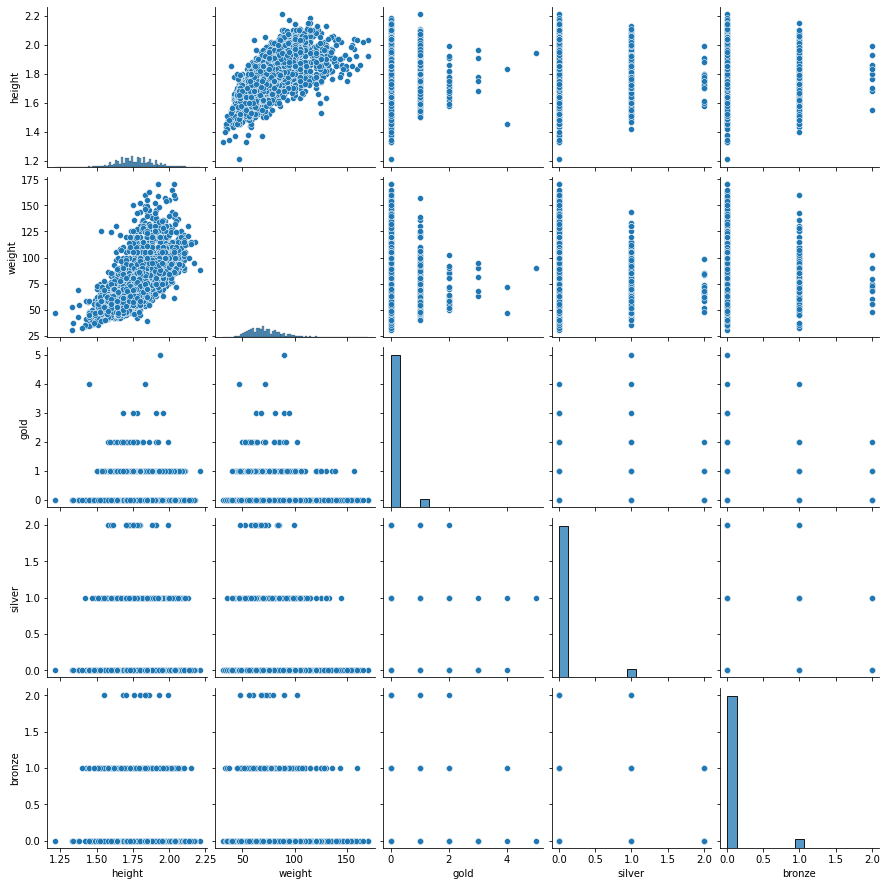

In [ ]:
sns.pairplot(athletes)

Преобразуем колонке с полом в числовые значения 0 и 1

In [ ]:
athletes['sex'].replace(['female','male'],
                        [0, 1], inplace=True)

Преобразуем категориальные переменные к колонке sport в числовые переменные

In [ ]:
dumies = pd.get_dummies(athletes['sport'])

In [ ]:
athletes = pd.concat([athletes,dumies], axis = 'columns')

In [ ]:
athletes.drop('sport',axis = 'columns', inplace = True)

In [ ]:
athletes.head()

,sex,height,weight,gold,silver,bronze,aquatics,archery,athletics,badminton,...,rugby sevens,sailing,shooting,table tennis,taekwondo,tennis,triathlon,volleyball,weightlifting,wrestling
0,1,1.72,64.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.68,56.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1.98,79.0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.83,80.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1.81,71.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Разделяем датафрейм на целевую переменную и признаки

In [ ]:
athletes.columns

Index(['sex', 'height', 'weight', 'gold', 'silver', 'bronze', 'aquatics',
       'archery', 'athletics', 'badminton', 'basketball', 'canoe', 'cycling',
       'equestrian', 'fencing', 'football', 'golf', 'gymnastics', 'handball',
       'hockey', 'judo', 'modern pentathlon', 'rowing', 'rugby sevens',
       'sailing', 'shooting', 'table tennis', 'taekwondo', 'tennis',
       'triathlon', 'volleyball', 'weightlifting', 'wrestling'],
      dtype='object')

In [ ]:
y = athletes['sex']

In [ ]:
X = athletes[['height', 'weight', 'gold', 'silver', 'bronze', 'aquatics',
       'archery', 'athletics', 'badminton', 'basketball', 'canoe', 'cycling',
       'equestrian', 'fencing', 'football', 'golf', 'gymnastics', 'handball',
       'hockey', 'judo', 'modern pentathlon', 'rowing', 'rugby sevens',
       'sailing', 'shooting', 'table tennis', 'taekwondo', 'tennis',
       'triathlon', 'volleyball', 'weightlifting', 'wrestling']]

Делим данные на обучающую и тестовую выборку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Строим модель логистической регрессии

In [ ]:
model_lr = LogisticRegression()

Обучаем модель

In [ ]:
model_lr.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Получаем предсказание обученной модели

In [ ]:
predictions = model_lr.predict(X_test)

Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.

In [ ]:
model_lr.score(X_train, y_train)

0.8122265714943587

In [ ]:
model_lr.score(X_test,y_test)

0.8167587476979742

In [ ]:
predict_probability= model_lr.predict_proba(X_test)

Строим ROC-кривую с помощью функции sklearn.metrics. roc_curve

In [ ]:
fpr, tpr, thres = roc_curve( y_test, predict_probability[:,1])

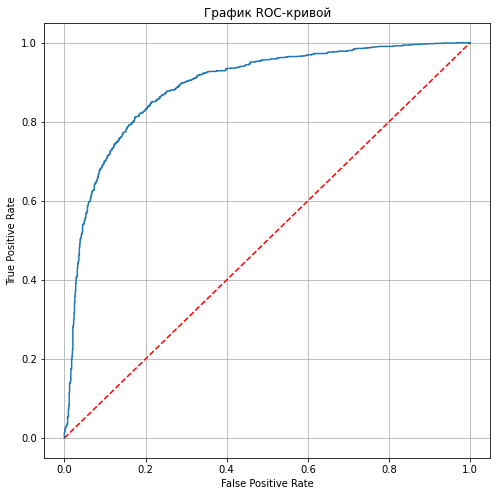

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot( fpr, tpr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('График ROC-кривой')
plt.plot([0, 1], [0, 1],'r--')
plt.grid()

In [ ]:
roc_auc_score(y_test, predict_probability[:,1])

0.8894326430460542

In [ ]:
auc(fpr, tpr)

0.8894326430460542

Реализуем подсчет метрик TPR, FPR «вручную» (male(1)- позитивный класс, female(0) - негативный класс)

In [ ]:
True_positive = 0
False_positive = 0
False_negative = 0
True_negative = 0

In [ ]:
for test , pred in zip(y_test, predictions):
    #true positive: классификатор верно отнёс объект к рассматриваемому классу.
    if test == 1 and pred == 1:
      True_positive +=1
    #true negative: классификатор верно утверждает, что объект не принадлежит к рассматриваемому классу.
    elif test == 0 and pred == 0:
      True_negative = 0
    #false positive: классификатор неверно отнёс объект к рассматриваемому классу
    elif test == 0 and pred == 1:
      False_positive += 1
    #false negative: классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.
    elif test == 1 and pred == 0:
      False_negative +=1


In [ ]:
precision = True_positive / (True_positive + False_positive)
precision

0.8349261511728931

In [ ]:
recall = True_positive / (True_positive + False_negative)
recall

0.8220701454234388

In [ ]:
precision_score(y_test, predictions)

0.8349261511728931

In [ ]:
recall_score(y_test, predictions)

0.8220701454234388

Создадим датафрейм чтобы построить ROC-кривую с разными порогами вероятностей

In [ ]:
roc = pd.DataFrame({
    'proba': predict_probability[:, 1],
    'test': y_test,
    'predict':predictions
    })

In [ ]:
roc.sort_values(by = 'proba')

,proba,test,predict
5890,0.002477,0,0
7846,0.002810,0,0
2359,0.004072,0,0
9895,0.005031,0,0
7284,0.006020,0,0
...,...,...,...
5897,0.999986,1,1
10582,0.999988,1,1
2425,0.999994,1,1
2346,0.999997,1,1


Раситываем значения TPR и FPR для разных порогов вероятностей, а так же значения precision и recall для разных порогов вероятностей

In [ ]:
thresholds = np.arange(0, 1, 0.01)

In [ ]:
TPR = []
FPR = []
Precision = []
Recall = []
for threshold in thresholds:
    True_positive = 0
    False_positive = 0
    False_negative = 0
    True_negative = 0
    for proba , test in zip(roc['proba'],roc['test']):
        if proba >= threshold:
            pred = 1
        else:
            pred = 0
        if pred == 1:
            if test == 1:
                True_positive += 1
            else:
                False_positive += 1

        else:
            if test == 1:
                False_negative += 1
            else:
                True_negative += 1
    tpr2 = True_positive/(True_positive + False_negative)
    fpr2 = False_positive/(False_positive + True_negative)
    precision = True_positive/(True_positive + False_positive)
    recall = tpr2
    FPR.append(fpr2)
    TPR.append(tpr2)
    Precision.append(precision)
    Recall.append(recall)

Стоим ROC-кривую

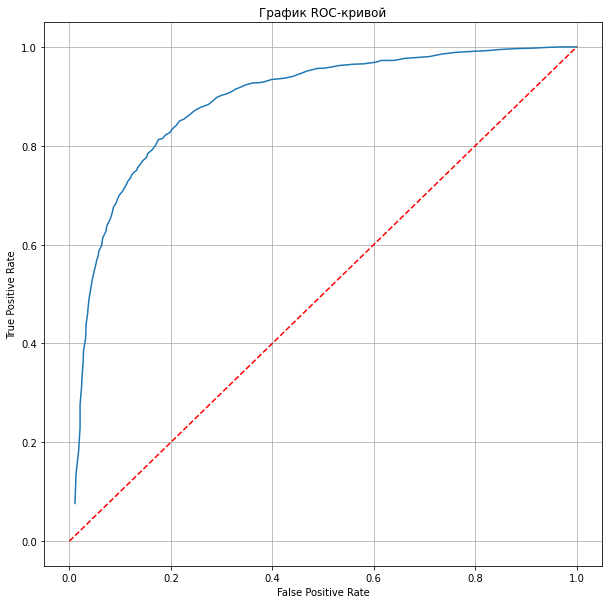

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(FPR,TPR)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('График ROC-кривой')
plt.grid()

Объединим графики 

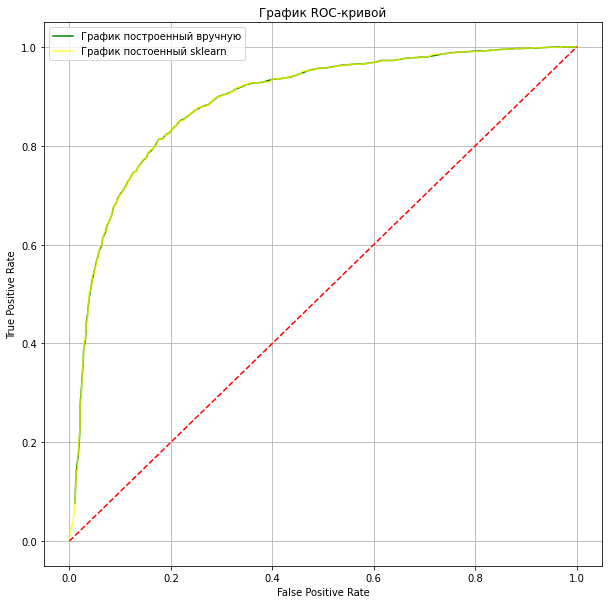

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(FPR,TPR,label = 'График построенный вручную', color = 'green')
plt.plot(fpr,tpr, label = 'График постоенный sklearn', alpha = 0.75, color = 'yellow')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('График ROC-кривой')
plt.legend( loc = 0 )
plt.grid()

Как мы видим графики практически полностью совпадают

Построим графики Precision и Recall

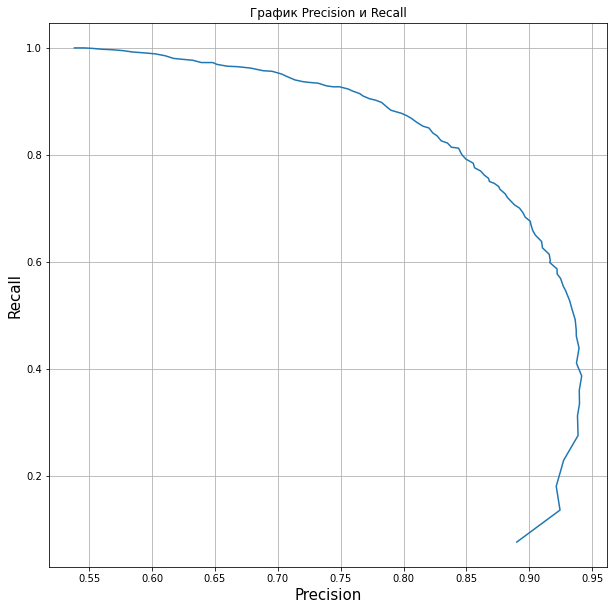

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(Precision,Recall)
plt.xlabel('Precision',fontdict={'fontsize': 15})
plt.ylabel('Recall',fontdict={'fontsize': 15})
plt.title('График Precision и Recall')
plt.grid()

In [ ]:
from sklearn.metrics import auc

Посчитаем площадь под ROC-кривой

In [ ]:
auc(FPR,TPR) # ручная реализация

0.8889989569358647

In [ ]:
auc(fpr, tpr) # реализация sklearn

0.8894326430460542

#Вывод:
У данной модели достаточно высокие значения метрик Precision и Recall, что говорит о том что модель достаточно хорошо обучилась и может с высокой долей вероятности определить верный класс(Precision) и достаточно большая вероятность того что все нужные нам классы попадут в предсказанние модели(Recall).

При сравнение площадей ROC-кривых разных реализаций, можно заметить, что площать под ROC-кривой постоенной вручную незначительно меньше, возможно имеется небольшая погрешность в расчетах при ручной реализации. Я бы предпочел пользоваться готовыми методами чтобы избежать ошибок.

ROC-кривая может проходить ниже диагонали, это соответсвует наихудшему результату работы модели